In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
input_name = '/kaggle/input/data-remove-fix-3/data_remove_fixed_3.csv'
df = pd.read_csv(input_name, index_col=0)
df.head()

,Title,Link,Genre,Author,Description
0,31 Tuổi Thì Đã Làm Sao?,https://khosachonline.com/sach/31-tuoi-thi-da-...,Tâm Lý - Kỹ Năng Sống,Fumio Yamamoto,31 31 31 bụngdưới lễphục size phẳngphiu tưởngt...
1,31 Tuổi Thì Đã Làm Sao?,https://khosachonline.com/sach/31-tuoi-thi-da-...,Tâm Lý - Kỹ Năng Sống,Fumio Yamamoto,31 31 bụngdưới lễphục size phẳngphiu tưởngtượn...
2,31 Tuổi Thì Đã Làm Sao?,https://khosachonline.com/sach/31-tuoi-thi-da-...,Tâm Lý - Kỹ Năng Sống,Fumio Yamamoto,31 bụngdưới lễphục size phẳngphiu tưởngtượng m...
3,31 Tuổi Thì Đã Làm Sao?,https://khosachonline.com/sach/31-tuoi-thi-da-...,Tâm Lý - Kỹ Năng Sống,Fumio Yamamoto,bụngdưới lễphục size phẳngphiu tưởngtượng mẹ đ...
4,31 Tuổi Thì Đã Làm Sao?,https://khosachonline.com/sach/31-tuoi-thi-da-...,Tâm Lý - Kỹ Năng Sống,Fumio Yamamoto,lễphục size phẳngphiu tưởngtượng mẹ đứa trẻ dá...


In [22]:
df.shape

(29401, 5)

In [3]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False)

y  = onehot.fit_transform(df[['Genre']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit(df['Description'])
X = count_vectorizer.fit_transform(df['Description']).toarray()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape

(23520, 8682)

In [30]:
from keras.layers.regularization.dropout import Dropout
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(BatchNormalization(input_dim=8682))
model.add(Dense(200, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(400, kernel_initializer='normal', activation='relu'))
model.add(Dense(300, kernel_initializer='normal', activation='relu'))
model.add(Dense(150, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, activation='sigmoid'))

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, monitor='val_loss', mode='min')
#binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test), callbacks=[ early_stopping,model_checkpoint, reduce_lr])


Epoch 1/100
735/735 [==============================] - 18s 23ms/step - loss: 0.0332 - accuracy: 0.9093 - val_loss: 0.0031 - val_accuracy: 0.9934 - lr: 0.0010
Epoch 2/100
735/735 [==============================] - 16s 22ms/step - loss: 0.0025 - accuracy: 0.9928 - val_loss: 0.0039 - val_accuracy: 0.9923 - lr: 0.0010
Epoch 3/100
735/735 [==============================] - 17s 23ms/step - loss: 0.0026 - accuracy: 0.9923 - val_loss: 0.0051 - val_accuracy: 0.9930 - lr: 0.0010
Epoch 4/100
735/735 [==============================] - 17s 23ms/step - loss: 0.0022 - accuracy: 0.9930 - val_loss: 0.0061 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 5/100
735/735 [==============================] - 17s 23ms/step - loss: 0.0021 - accuracy: 0.9940 - val_loss: 0.0113 - val_accuracy: 0.9903 - lr: 0.0010
Epoch 6/100
735/735 [==============================] - 17s 23ms/step - loss: 0.0023 - accuracy: 0.9931 - val_loss: 0.0094 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 7/100
735/735 [==============================]

In [32]:
# Kiểm tra trên tập test
results = model.evaluate(X_test, y_test)
print('Test loss: {:4f}'.format(results[0]))
print('Test accuracy: {:4f}'.format(results[1]))

184/184 [==============================] - 1s 5ms/step - loss: 8.9574e-04 - accuracy: 0.9949
Test loss: 0.000896
Test accuracy: 0.994899


Minimum validation loss: 0.0008957366226240993


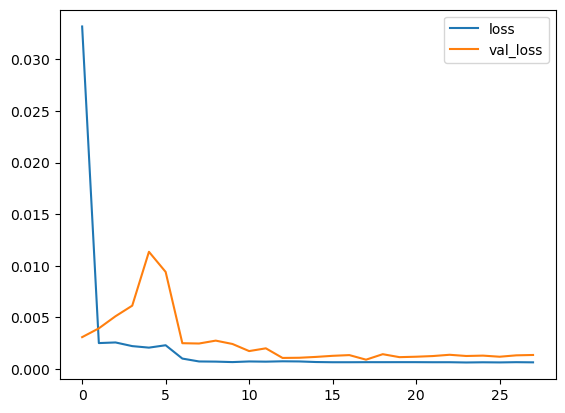

In [34]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [36]:
model.save('best_model.h5')

In [92]:
import joblib

joblib.dump(count_vectorizer, 'count_vectorizer_99.joblib')
joblib.dump(onehot, 'one_hot_encoder_99.joblib')

['one_hot_encoder_99.joblib']